In [2]:
import os
print(os.path.abspath('.'))

C:\Users\HASEE\text


In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap,addcyclic,shiftgrid

In [3]:
#导入数据
ds1 = xr.open_dataset('D:\Desktop\data310\data2021tempri.nc')
ds2 = xr.open_dataset('D:\Desktop\data310\data2019_200hpa_Geop.nc')
ds1

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-04-18 07:19:56 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
#赋值 t2m tp
lat_ds1=ds1.latitude
lon_ds1=ds1.longitude
time_ds1=ds1.time
t2m_ds1=ds1.t2m
tp_ds1=ds1.tp
#200hpa Geop
lat_ds2=ds2.latitude
lon_ds2=ds2.longitude
time_ds2=ds2.time
z_ds2=ds2.z
print(z_ds2.values)

[[[109016.19  109016.19  109016.19  ... 109016.19  109016.19  109016.19 ]
  [109021.234 109021.234 109021.234 ... 109021.55  109021.55  109021.234]
  [109025.96  109025.96  109025.65  ... 109026.27  109026.27  109026.27 ]
  ...
  [108889.45  108889.14  108889.14  ... 108889.45  108889.45  108889.45 ]
  [108894.19  108894.19  108894.19  ... 108894.19  108894.19  108894.19 ]
  [108898.914 108898.914 108898.914 ... 108898.914 108898.914 108898.914]]

 [[108869.28  108869.28  108869.28  ... 108869.28  108869.28  108869.28 ]
  [108866.125 108866.44  108866.44  ... 108865.81  108865.81  108866.125]
  [108862.66  108862.98  108862.98  ... 108862.03  108862.03  108862.34 ]
  ...
  [108426.03  108426.03  108426.03  ... 108426.34  108426.34  108426.34 ]
  [108417.516 108417.516 108417.516 ... 108417.516 108417.516 108417.516]
  [108409.32  108409.32  108409.32  ... 108409.32  108409.32  108409.32 ]]

 [[107112.03  107112.03  107112.03  ... 107112.03  107112.03  107112.03 ]
  [107131.266 107131.2

In [493]:
# #for循环，求年平均、DJF、JJA
# ave0=np.zeros([721,1440])
# for i in range(721):
#     for j in range(1440):
#         ave0[i,j]=np.mean(t2m_ds1[:,i,j])
# print(ave0)

# ave2=np.zeros([721,1440])
# for i in range(721):
    for j in range(1440):
#         ave2[i,j]=np.mean(t2m_ds1[5:8,i,j])
# print(ave2)

In [29]:
#  annual mean温度平均值
t2m_annualmean_ds1 =t2m_ds1[:,:,:].mean(dim='time')
# DJF 2m 温度平均值
t2m_DJFmean_ds1 =t2m_ds1[11:14,:,:].mean(dim='time')
# JJA 2m 温度平均值
t2m_JJAmean_ds1 =t2m_ds1[5:8,:,:].mean(dim='time')
t2m_annualmean_ds1

<xarray.DataArray 't2m' (latitude: 721, longitude: 1440)>
array([[259.80124, 259.80124, 259.80124, ..., 259.80124, 259.80124,
        259.80124],
       [259.92242, 259.92285, 259.92285, ..., 259.92172, 259.92184,
        259.92203],
       [260.0486 , 260.04916, 260.04932, ..., 260.04684, 260.0474 ,
        260.04807],
       ...,
       [226.92206, 226.92383, 226.92664, ..., 226.91681, 226.91972,
        226.92151],
       [226.7558 , 226.75758, 226.75911, ..., 226.75249, 226.7533 ,
        226.75456],
       [226.13951, 226.13951, 226.13951, ..., 226.13951, 226.13951,
        226.13951]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

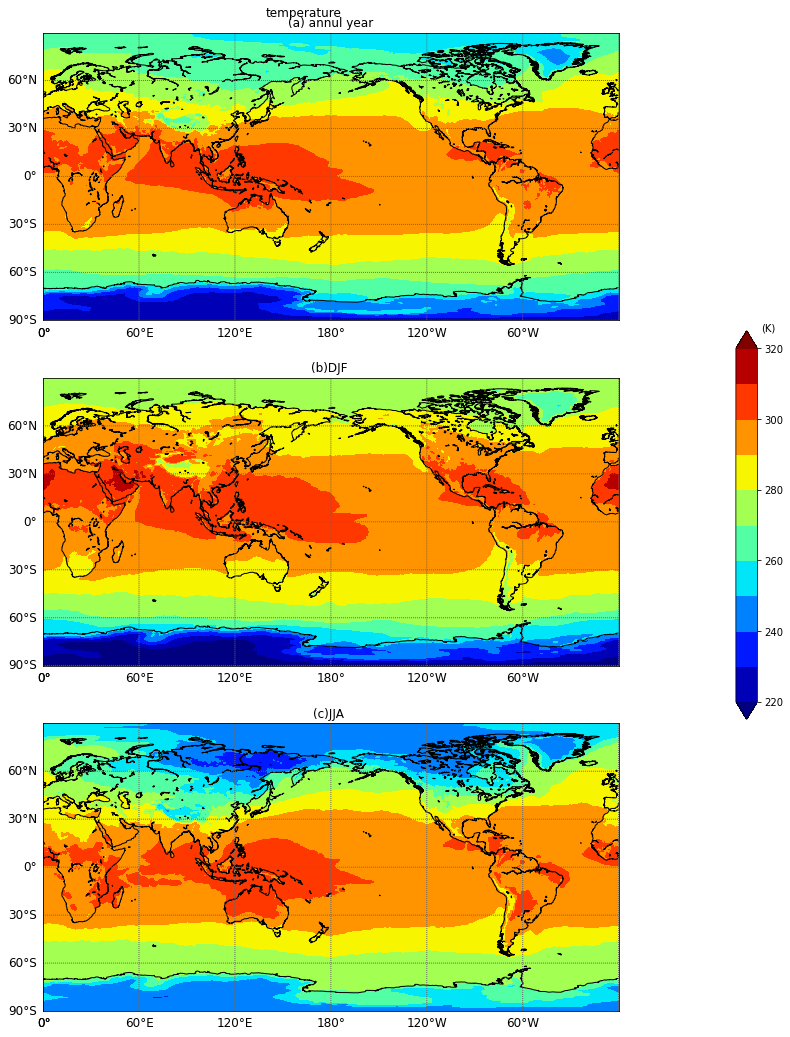

In [93]:
# 2021年温度，降雨图
#创建map,地图投影库，cyl投影方式，
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='l')
#创建画布，命名。
fig=plt.figure(figsize=(30,18))
fig.suptitle('temperature',fontsize=12,x=0.5,y=0.9)

# 在画布上绘制子图，划分为3行一列，选中图1，命名。
ax1=fig.add_subplot(311)
ax1.set_title('(a) annul year')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)

# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x1,y1 = map(lons, lats)
clevs=np.linspace(220,320,11)
cs1=map.contourf(x1,y1,t2m_annualmean_ds1,clevs,cmap='jet',extend='both')

ax2=fig.add_subplot(312)
ax2.set_title('(b)DJF ')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)

# 创建填充等值线图
x1,y1 = map(lons, lats)
cs2=map.contourf(x1,y1,t2m_JJAmean_ds1,clevs,cmap='jet',extend='both')

#第三个图JJA平均温度图
ax3=fig.add_subplot(313)
ax3.set_title('(c)JJA ')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)

# 创建填充等值线图
x1,y1 = map(lons, lats)
cs3=map.contourf(x1,y1,t2m_DJFmean_ds1,clevs,cmap='jet',extend='both')

cb_ax = fig.add_axes([0.7, 0.35, 0.01, 0.3])
cbar = fig.colorbar(cs1,cax=cb_ax,orientation='vertical')
cbar.set_label('(K)', labelpad=-15, y=1.02, rotation=0)

fig.savefig('D:\\Desktop\\data310\\t2m.pdf',dpi=300,bbox_inches='tight')

In [451]:
# #for循环，求tp年平均、DJF、JJA
# avepr12=np.zeros([721,1440])
# for i in range(721):
#     for j in range(1440):
#         avepr12[i,j]=np.mean(tp_ds1[:,i,j])
# print(avepr12)

[[0.00067691 0.00067691 0.00067691 ... 0.00067691 0.00067691 0.00067691]
 [0.00070045 0.00070045 0.00070045 ... 0.0007006  0.0007006  0.0007006 ]
 [0.00070364 0.00070394 0.00070394 ... 0.00070394 0.00070394 0.00070379]
 ...
 [0.00014322 0.00014322 0.00014322 ... 0.00014322 0.00014322 0.00014322]
 [0.00014033 0.00014033 0.00014033 ... 0.00014018 0.00014033 0.00014033]
 [0.00014853 0.00014853 0.00014853 ... 0.00014853 0.00014853 0.00014853]]


In [31]:
#  annual mean降雨平均值
tp_annual_ds1 =1000*tp_ds1[:,:,:].mean(dim='time')
# DJF 2m 温度平均值
tp_DJFmean_ds1 =1000*tp_ds1[11:14,:,:].mean(dim='time')
# JJA 2m 温度平均值
tp_JJAmean_ds1 =1000*tp_ds1[5:8,:,:].mean(dim='time')
tp_annual_ds1

<xarray.DataArray 'tp' (latitude: 721, longitude: 1440)>
array([[0.6769076 , 0.6769076 , 0.6769076 , ..., 0.6769076 , 0.6769076 ,
        0.6769076 ],
       [0.700448  , 0.700448  , 0.700448  , ..., 0.70060045, 0.70060045,
        0.70060015],
       [0.70363814, 0.7039414 , 0.7039414 , ..., 0.70394206, 0.70394206,
        0.70379025],
       ...,
       [0.14321692, 0.14321692, 0.14321692, ..., 0.14321692, 0.14321692,
        0.14321692],
       [0.14033106, 0.14033106, 0.14033106, ..., 0.14017926, 0.14033106,
        0.14033106],
       [0.1485326 , 0.1485326 , 0.1485326 , ..., 0.1485326 , 0.1485326 ,
        0.1485326 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

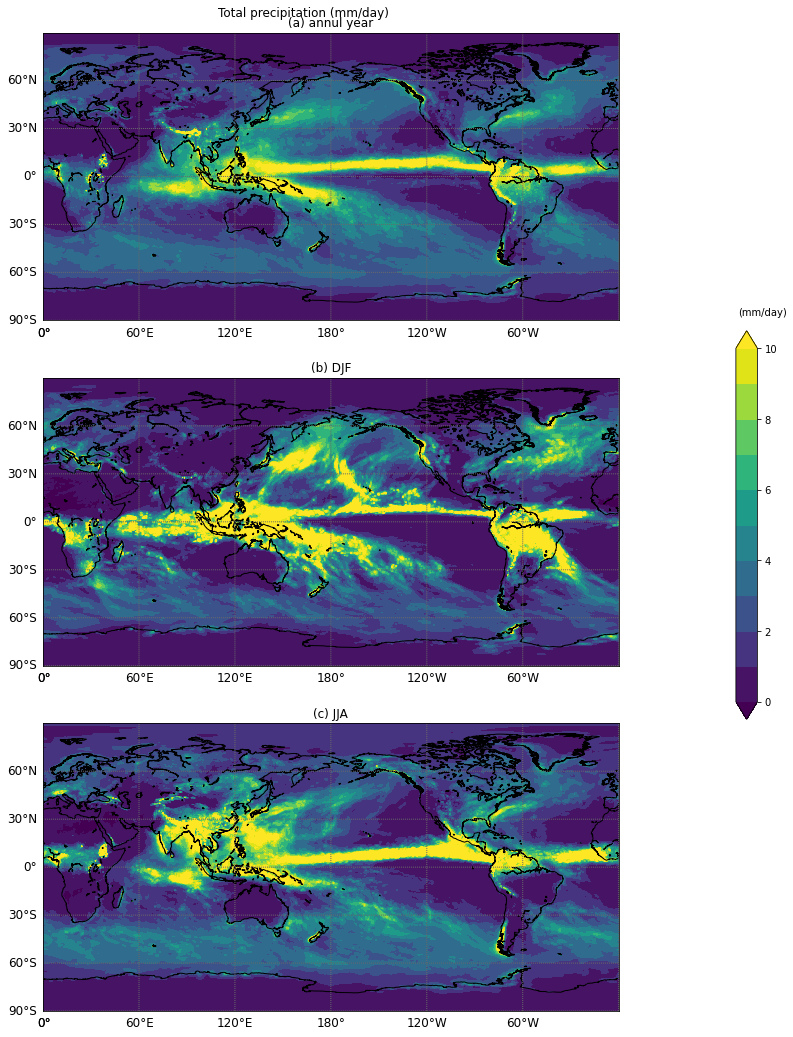

In [94]:
# 2021年降雨图
#创建map,地图投影库，cyl投影方式，
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='l')

#创建画布，命名。
fig=plt.figure(figsize=(30,18))
fig.suptitle('Total precipitation (mm/day)',fontsize=12,x=0.5,y=0.9)
# 在画布上绘制子图，划分为3行一列，选中图1，命名。
ax1=fig.add_subplot(311)
ax1.set_title('(a) annul year')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x1,y1 = map(lons, lats)
clevs=np.linspace(0,10,11)
cs1=map.contourf(x1,y1,tp_annual_ds1,clevs,cmap=plt.cm.viridis,extend='both')

ax2=fig.add_subplot(312)
ax2.set_title('(b) DJF')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
cs2=map.contourf(x1,y1,tp_DJFmean_ds1,clevs,cmap=plt.cm.viridis,extend='both')

ax3=fig.add_subplot(313)
ax3.set_title('(c) JJA')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
cs3=map.contourf(x1,y1,tp_JJAmean_ds1,clevs,cmap=plt.cm.viridis,extend='both')

cb_ax = fig.add_axes([0.7, 0.35, 0.01, 0.3])
cbar = fig.colorbar(cs1,cax=cb_ax,orientation='vertical')
cbar.set_label('(mm/day)', labelpad=-15, y=1.06, rotation=0)
fig.savefig('D:\\Desktop\\data310\\total_precipitation.pdf',dpi=300,bbox_inches='tight')

In [50]:
#  annual mean 200hpa 位势高度平均值
z_annual_ds2 =z_ds2[:,:,:].mean(dim='time')/9.8
# DJF 位势高度平均值
z_DJFmean_ds2 =z_ds2[11:14,:,:].mean(dim='time')/9.8
# JJA 2m 温度平均值
z_JJAmean_ds2 =z_ds2[5:8,:,:].mean(dim='time')/9.8
z_DJFmean_ds2

<xarray.DataArray 'z' (latitude: 721, longitude: 1440)>
array([[11023.637 , 11023.637 , 11023.637 , ..., 11023.637 , 11023.637 ,
        11023.637 ],
       [11025.6   , 11025.6   , 11025.6   , ..., 11025.631 , 11025.631 ,
        11025.631 ],
       [11027.593 , 11027.562 , 11027.562 , ..., 11027.593 , 11027.593 ,
        11027.593 ],
       ...,
       [10940.4795, 10940.512 , 10940.544 , ..., 10940.447 , 10940.447 ,
        10940.447 ],
       [10939.289 , 10939.289 , 10939.289 , ..., 10939.225 , 10939.257 ,
        10939.257 ],
       [10937.97  , 10937.97  , 10937.97  , ..., 10937.97  , 10937.97  ,
        10937.97  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

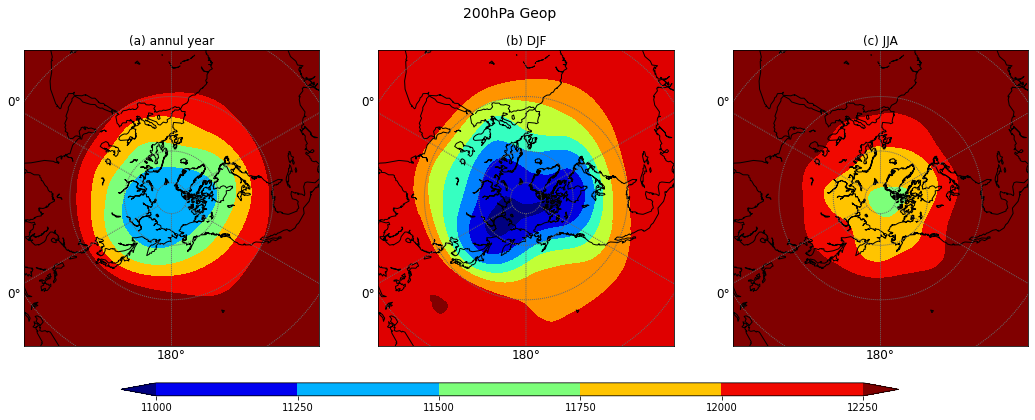

In [109]:
# 2021年200ha位势高度图
#创建map,地图投影库，cyl投影方式，
map = Basemap(projection='npstere',boundinglat=10,lon_0=180)

#创建画布，命名。
fig=plt.figure(figsize=(18,18))
fig.suptitle('200hPa Geop',fontsize=14,x=0.5,y=0.65)
# 在画布上绘制子图，划分为3行一列，选中图1，命名。
ax1=fig.add_subplot(131)
ax1.set_title('(a) annul year')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x3,y3 = map(lons, lats)
clevs=np.linspace(11000,12000,11)
cs1=map.contourf(x3,y3,z_annual_ds2,cmap='jet',extend='both')


ax2=fig.add_subplot(132)
ax2.set_title('(b) DJF')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x3,y3 = map(lons, lats)
clevs=np.linspace(0,10,11)
cs2=map.contourf(x3,y3,z_DJFmean_ds2,cmap='jet',extend='both')

ax3=fig.add_subplot(133)
ax3.set_title('(c) JJA')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x3,y3 = map(lons, lats)
clevs=np.linspace(0,10,11)
cs3=map.contourf(x3,y3,z_JJAmean_ds2,cmap='jet',extend='both')
cb_ax = fig.add_axes([0.2, 0.35, 0.6, 0.01])
cbar = fig.colorbar(cs1, cax=cb_ax, orientation='horizontal')
# fig.savefig('200hpaGrop.pdf',dpi=300,bbox_inches='tight')

In [110]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [112]:
#创建画布，命名。
fig=plt.figure(figsize=(18,18))
fig.suptitle('200hPa Geop',fontsize=14,x=0.2,y=0.9)
# 在画布上绘制子图，划分为3行一列，选中图1，命名。
ax1=fig.add_subplot(131)
ax1.set_title('(a) annul year')
ax1 = plt.axes(projection=ccrs.NorthPolarStereo())
#在圆柱投影中proj = ccrs.PlateCarree(central_longitude=xx)
box = (-180,180,0,90)
xstep, ystep = 30, 15
ax1.set_extent(box, crs=ccrs.PlateCarree()
#注意此处添加了projection = ccrs.NorthPolarStereo()，指明该axes为北半球极地投影
#通过圆柱投影的范围限制地图范围，这样设置地图参数较为方便
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
#######以下为网格线的参数######
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = Path(verts * radius + center)
##############################
ax1.set_boundary(circle, transform=ax1.transAxes)
#设置axes边界，为圆形边界，否则为正方形的极地投影
#c7 = f3_ax1.contourf(lon,lat,r, zorder=0, levels =np.arange(-0.6,0.7,0.1) , extend = 'both',transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
#绘制填色，需要说明的是：虽然是极地投影，但是我们的数据仍是按圆柱投影计算的，所以数据的坐标转换仍为transform=ccrs.PlateCarree()

SyntaxError: invalid syntax (<ipython-input-112-21841461aa2f>, line 14)

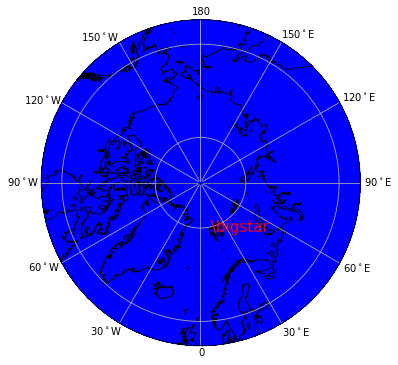

In [115]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
box = [-180, 180, 55, 90]
xstep, ystep = 30, 15
# Limit the map to -60 degrees latitude and below.
ax.set_extent(box, crs=ccrs.PlateCarree())
scale = '50m'
land = cfeature.NaturalEarthFeature('physical', 'land', scale, edgecolor='face',
                                    facecolor=cfeature.COLORS['land'])
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', scale, edgecolor='face',
                                     facecolor=cfeature.COLORS['water'])
ax.add_feature(land, facecolor='0.75')
ax.add_feature(ocean, facecolor='blue')
ax.coastlines(scale, linewidth=0.9)
# 标注坐标轴
line = ax.gridlines(draw_labels=False)

line.ylocator = mticker.FixedLocator(np.arange(40, 90, 20))  # 手动设置x轴刻度
line.xlocator = mticker.FixedLocator(np.arange(-180, 210, 30))  # 手动设置x轴刻度
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# 创建要标注的labels字符串
ticks = np.arange(0, 210, 30)
etick = ['0'] + ['%d$^\circ$E' % tick for tick in ticks if (tick != 0) & (tick != 180)] + ['180']
wtick = ['%d$^\circ$W' % tick for tick in ticks if (tick != 0) & (tick != 180)]
labels = etick + wtick
# 创建与labels对应的经纬度标注位置
# xticks=[i for i in np.arange(0,210,30)]+[i for i in np.arange(-32,-180,-30)]
xticks = [-0.8, 28, 58, 89.1, 120, 151, 182.9, -36, -63, -89, -114, -140]
yticks = [53] + [53] + [54] + [55] * 2 + [54.5] + [54] + [50] + [49] * 3 + [50.6]

# 标注经纬度
# ax.text(0.01,0.23,'60$^\circ$W',transform=ax.transAxes,rotation=25)
# ax.text(-63,50,'60$^\circ$W',transform=ccrs.Geodetic(),rotation=25)
for xtick, ytick, label in zip(xticks, yticks, labels):
    ax.text(xtick, ytick, label, transform=ccrs.Geodetic())
x = [180, 180, 0, 0]
y = [50, 90, 90, 50]
ax.plot([-180, 0], [80, 80], ':', transform=ccrs.Geodetic(), color='k', linewidth=0.4)
ax.plot([-90, 90], [80, 80], ':', transform=ccrs.Geodetic(), color='k', linewidth=0.5)
# ax.plot([90,0],[50,50],'-.',transform=ccrs.Geodetic(),color='r', linewidth=6)

ax.text(11.9333, 78.9166, r'\bigstar', transform=ccrs.Geodetic(), size=15, color='r')
plt.show()